<a href="https://colab.research.google.com/github/Casyvina/Tensorflow-projects/blob/main/time_series_forcasts_bitcoin_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d133b766-5045-a5f9-137b-da147669f93a)


## Dependencies Import

In [ ]:
#downloading data from github
!wget https://raw.githubusercontent.com/Casyvina/Tensorflow-projects/main/assets/bitcoin_2013-10-01_2023-09-06.csv

--2023-09-08 21:20:30--  https://raw.githubusercontent.com/Casyvina/Tensorflow-projects/main/assets/bitcoin_2013-10-01_2023-09-06.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 382659 (374K) [text/plain]
Saving to: ‘bitcoin_2013-10-01_2023-09-06.csv’

bitcoin_2013-10-01_ 100%[===================>] 373.69K  --.-KB/s    in 0.04s   

2023-09-08 21:20:30 (9.06 MB/s) - ‘bitcoin_2013-10-01_2023-09-06.csv’ saved [382659/382659]



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
# ignore the untrace function waring
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

## Exploring data

In [ ]:
# import packages and libraries
dataframe = pd.read_csv("/content/bitcoin_2013-10-01_2023-09-06.csv")
dataframe[:5]

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2023-09-05,2023-09-06,25832.11,25839.59,25573.33,25788.70,3.072003e+10,5.013095e+11
1,2023-09-04,2023-09-05,25958.07,26051.36,25677.71,25824.15,2.598490e+10,5.044351e+11
2,2023-09-03,2023-09-04,25859.24,26057.27,25830.07,25980.60,2.482436e+10,5.046746e+11
3,2023-09-02,2023-09-03,25795.04,25945.99,25760.02,25856.93,3.564394e+10,5.029054e+11
4,2023-09-01,2023-09-02,25966.92,26131.86,25400.90,25816.57,4.438128e+10,5.043267e+11


In [ ]:
# Reverse row order, export and reimport csv
df = dataframe.loc[::-1].reset_index(drop=True)
df.to_csv('bitcoin_2013-10-01_to_2023-09-06.csv', index=False)
df = pd.read_csv("/content/bitcoin_2013-10-01_to_2023-09-06.csv",
                 parse_dates=["Start"],
                 index_col=["Start"])
df.tail()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2023-09-01,2023-09-02,25966.92,26131.86,25400.90,25816.57,4.438128e+10,5.043267e+11
2023-09-02,2023-09-03,25795.04,25945.99,25760.02,25856.93,3.564394e+10,5.029054e+11
2023-09-03,2023-09-04,25859.24,26057.27,25830.07,25980.60,2.482436e+10,5.046746e+11
2023-09-04,2023-09-05,25958.07,26051.36,25677.71,25824.15,2.598490e+10,5.044351e+11
2023-09-05,2023-09-06,25832.11,25839.59,25573.33,25788.70,3.072003e+10,5.013095e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3627 entries, 2013-10-01 to 2023-09-05
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         3627 non-null   object 
 1   Open        3627 non-null   float64
 2   High        3627 non-null   float64
 3   Low         3627 non-null   float64
 4   Close       3627 non-null   float64
 5   Volume      3627 non-null   float64
 6   Market Cap  3627 non-null   float64
dtypes: float64(6), object(1)
memory usage: 226.7+ KB


In [ ]:
# How many samples
len(df)

3627

Assignement?

https://otexts.com/fpp3/tspatterns.html Read on Forecasting Principles and Practice

#2. Visualizing our data

In [ ]:
# Create only closing price for each day
bitcoin_prices = pd.DataFrame(data=df["Close"],)
bitcoin_prices.head()

,Close
Start,
2013-10-01,132.18
2013-10-02,114.13
2013-10-03,123.63
2013-10-04,129.01
2013-10-05,128.55


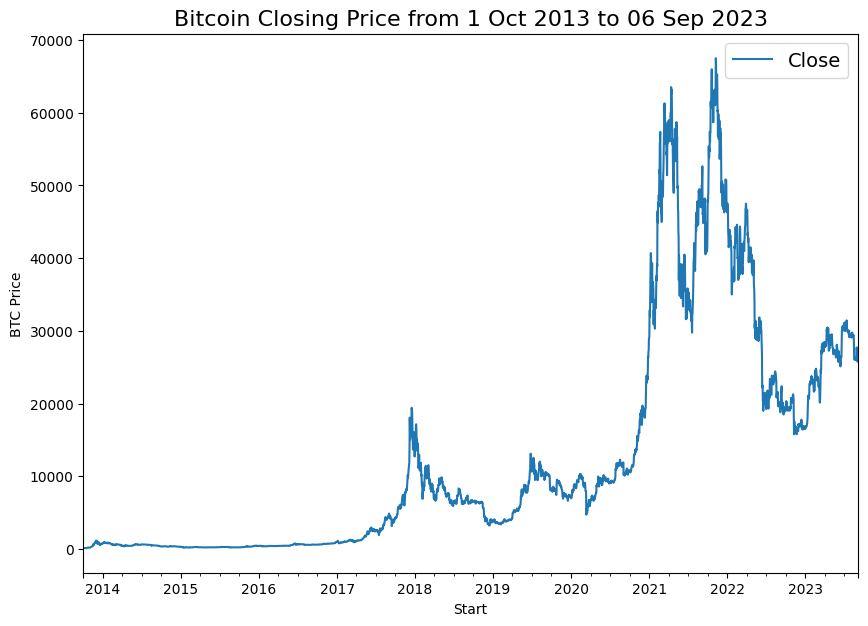

In [ ]:
# Visualized our data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Bitcoin Closing Price from 1 Oct 2013 to 06 Sep 2023", fontsize=16)
plt.legend(fontsize=14);

💭 Seem like my plot is backwards and year is very clutered. So let's fix that

In [ ]:
# Importing and formatting historical Bitcoin data with python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/bitcoin_2013-10-01_2023-09-06.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[5]))

# View first 10 of each
timesteps[:5], btc_price[:5]

([datetime.datetime(2023, 9, 6, 0, 0),
  datetime.datetime(2023, 9, 5, 0, 0),
  datetime.datetime(2023, 9, 4, 0, 0),
  datetime.datetime(2023, 9, 3, 0, 0),
  datetime.datetime(2023, 9, 2, 0, 0)],
 [25788.7, 25824.15, 25980.6, 25856.93, 25816.57])

In [ ]:
# reserved data
timesteps_r = timesteps[::-1]
btc_price_r = btc_price[::-1]
timesteps_r[:5], btc_price_r[:5]

([datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0)],
 [132.18, 114.13, 123.63, 129.01, 128.55])

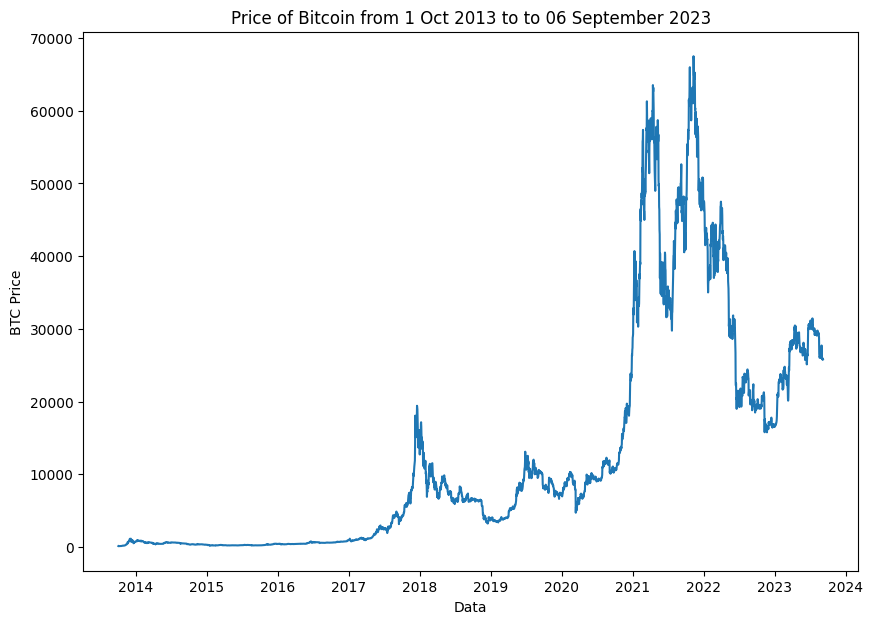

In [ ]:
# Plot from csv
plt.figure(figsize=(10, 7))
plt.plot(timesteps_r, btc_price_r)
plt.title("Price of Bitcoin from 1 Oct 2013 to to 06 September 2023")
plt.xlabel("Data")
plt.ylabel("BTC Price");

## Creating Train and test sets for time series data

In [ ]:
# Creating dictionary with the reserved columns
d = {'timesteps': timesteps_r , 'price': btc_price_r}

In [ ]:
# Create the DataFrame
bitcoin_prices = pd.DataFrame(d)
bitcoin_prices.head()

,timesteps,price
0,2013-10-02,132.18
1,2013-10-03,114.13
2,2013-10-04,123.63
3,2013-10-05,129.01
4,2013-10-06,128.55


In [ ]:
# Get our bitcoin data array
timesteps = bitcoin_prices['timesteps'].to_numpy()
prices = bitcoin_prices['price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2013-10-02T00:00:00.000000000', '2013-10-03T00:00:00.000000000',
        '2013-10-04T00:00:00.000000000', '2013-10-05T00:00:00.000000000',
        '2013-10-06T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([132.18, 114.13, 123.63, 129.01, 128.55]))

In [ ]:
# Wrong way to split  train/test set for time_series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2901,), (726,), (2901,), (726,))

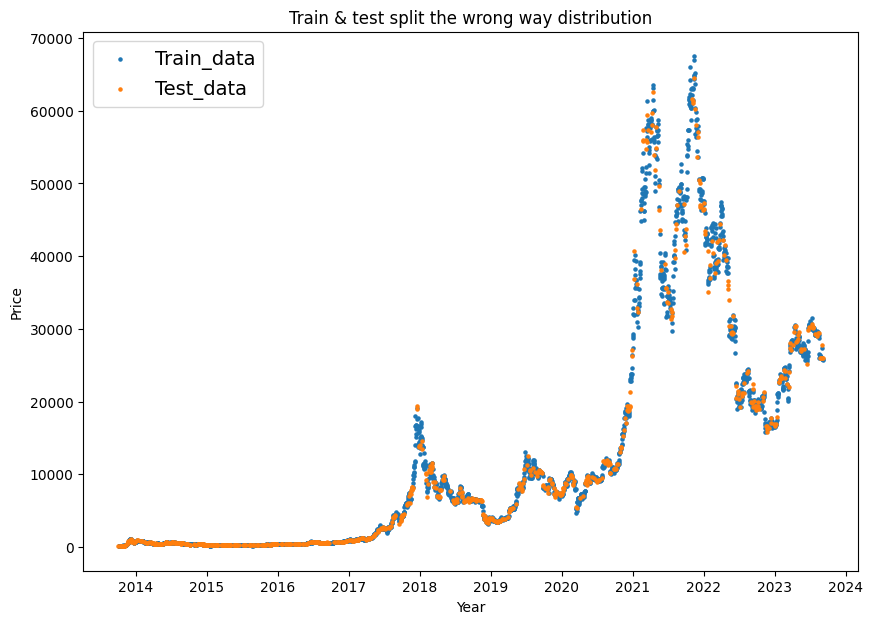

In [ ]:
# View our data with pyplot the wrong way
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train_data")
plt.scatter(X_test, y_test, s=5, label="Test_data")
plt.title("Train & test split the wrong way distribution")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(fontsize=14)
plt.show();

😂 wow this is so wrong , look at how all the data seem very scatter and how will the model learn from this, very impossible and surely very inaccurate result might be gotten

## Create train/test sets for time series (the right way)

![time series train & test sets](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-time-series-train-test-split.png)

In [ ]:
# Create train and test split the right way for the series data
split_size = int(0.8 * len(prices))

# Create train data split
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data split
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2901, 2901, 726, 726)

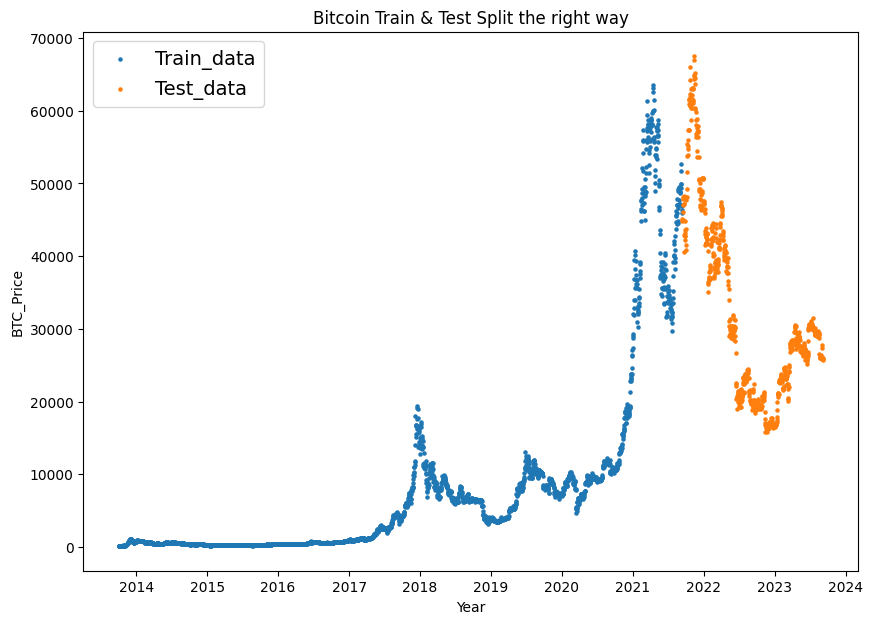

In [ ]:
# Let's view our prediction made with correct split
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5,label="Train_data")
plt.scatter(X_test, y_test, s=5, label="Test_data")
plt.title("Bitcoin Train & Test Split the right way")
plt.xlabel("Year")
plt.ylabel("BTC_Price")
plt.legend(fontsize=14);

### Create a plotting function
To ensure we dont repeat writing plot code. let create a function for plot.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  plot a timesteps (a series of points in time) against values (a series of values in time)

  Parameters
  --------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timestep)
  end : where to end the plot (setting a value will index from end of timesteps)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

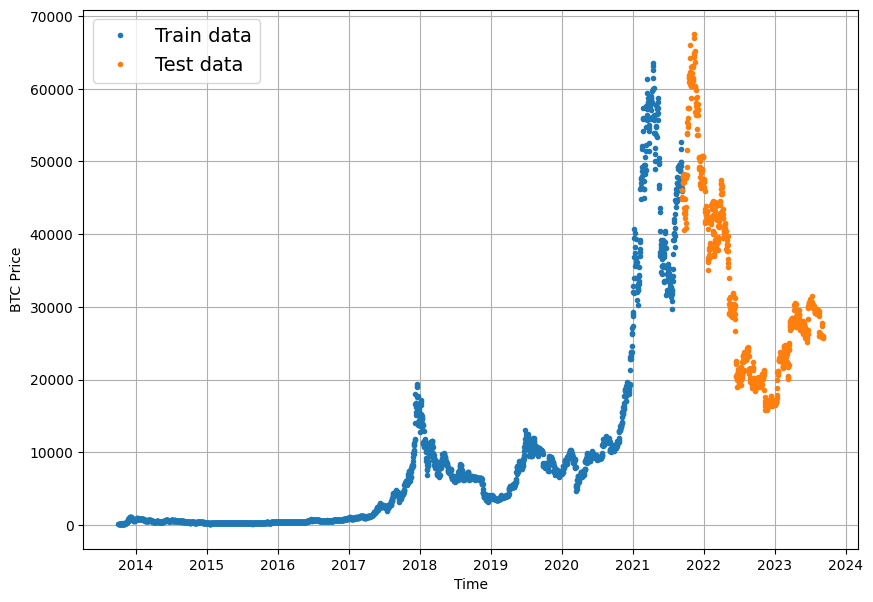

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Yhh, Fantastical

## Modelling Experiments

✅ Ensure input and outputs shape is correct.

✅ Not all model is useful, and can perform well in production.

✅ Two important term we use are **Horizon** and **Window**
  * **Horizon** = number of timesteps to be predict in future
  * **Window** = number of timesteps used from past to predict **Horizon**.

✅ Example: Predicting the current price(horizon) of Bitcoin with the last 7 days prices of bitcoin(window).

✅Model to be build in the project.

| Model No | Model Type | Horizon Size | Window Size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naive model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA |
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multvariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss function) | 1 | 7 | NA |
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA |
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |

>✅ Start simple first and go as complex as you can go.

>✅ Deep learning is powerful but that doesnt mean its will always work or perform well.

## Model 0: Navie forcast (baseline)

✅ Start with a baseline model (naive model) [naive forcast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method),

✅ it require no training *because* it  uses previous timestep value to predict the next timestep value

✅ Formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep `t` (y-hat) is equal to the value at timestep `t-1` (the previous timestep).

✅ Beating the navie forcast with any kind of model is hard in **open system**





In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1] # Every value except the last value
naive_forecast[:10], naive_forecast[-10:] # first 10 and last 10 values.

(array([44833.0831    , 45096.0509    , 46058.0015    , 44990.02141159,
        47012.9104    , 48092.9703    , 47816.2504    , 47197.5518    ,
        48210.7774    , 47201.5018    ]),
 array([26021.02, 26088.38, 26127.89, 27718.23, 27316.23, 25936.45,
        25816.57, 25856.93, 25980.6 , 25824.15]))

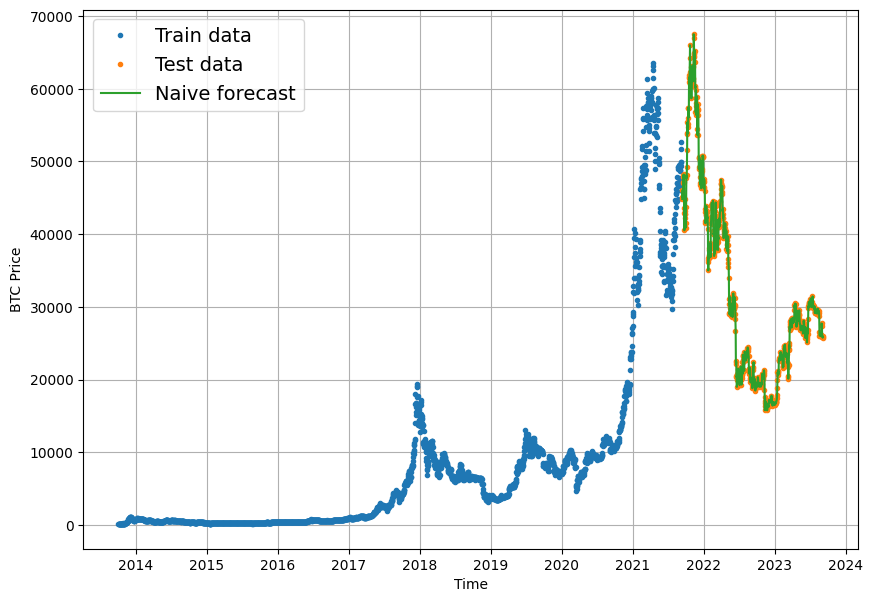

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

✅ Zoom in 🔭 for better look.

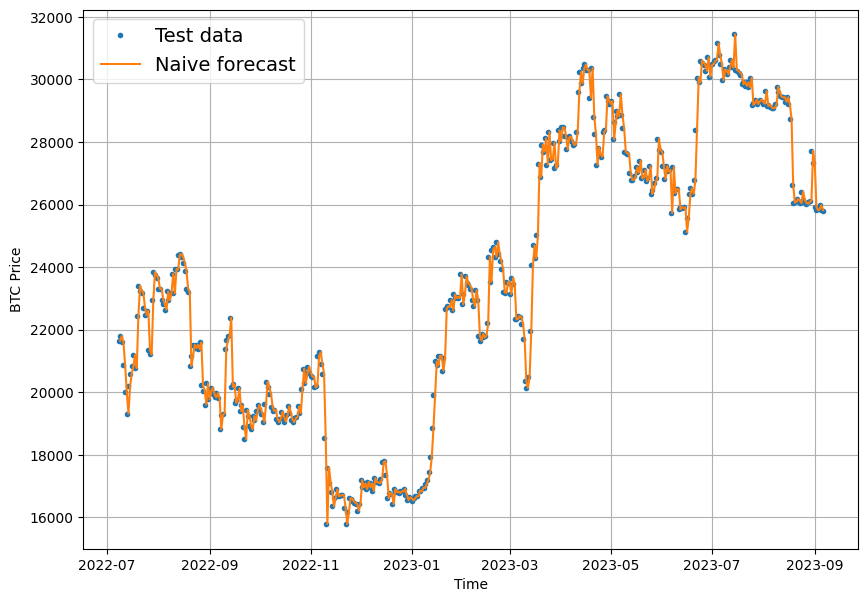

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast")

✅ Weldone Forcast made 👏. Now Evaluate

## Evaluate Time Series Model

✅Evaluating time series problem is a **regression problem**, using predicting a number, there we can use **regression evaluation metrics**

✅ Our goal is to know **how well our model predicts (`y_pred`) when compared to (`y_true`) (*ground truth values*)**

>📖**Read** [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html) ✅ *Done!*

✅ Evalaution metrics, **lower is better**
 (MAE 0 is better than MAE 100)

 -------

### Scale-dependent errors

Metrics is used to compare time series values and forecasts that are on the same scale e.g (BTC historical prices vs BTC forecast values)

✅ Types are SDE:

**MAE**(mean absolute error)

 `Forecast which minimises the MAE will lead to forecast of the median.`

 [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError)

 **RMSE**(root mean square error)

  `Forecast which minimise the RMSE lead to forecast of the mean.`

  `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`

------

#### Percentage errors

✅ No Units.

✅ Use to compare forecast across different datasets.

✅ Types PE:

**MAPE**(mean absolute percentage error)

`it uses percentage, and does not work if `y=0`.

[`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE)

**sMAPE**(symmtric mean absolute percentage error)

`used mostly in forcasting competitions. and not actual production ` [Forecasting: Principles and Practice](https://otexts.

------

#### Scaled errors

✅ Alternative to percentage errors when compareing different performances of time series.

**MASE** (mean absolute scaled error).

`very close to one`

`Forecast which perfrom better than the naive should get less than <1 MASE.`

[`mase_loss()`](https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16)

In [ ]:
# Import Tensorflow
import tensorflow as tf

📌 TensorFlow does not have the MASE(mean absolute scaled error) metric

📌Build one using inspiration from [sktime](https://github.com/alan-turing-institute/sktime)'s (Scikit-Learn for time series) [`MeanAbsoluteScaledError`](https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.performance_metrics.forecasting.MeanAbsoluteScaledError.html#sktime.performance_metrics.forecasting.MeanAbsoluteScaledError) class  

In [ ]:
# MASE implemented courtesy of sktime
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonility)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

✅ No use of training data.

If done correctly:

✅ Any naive model should achieve an MASE close to 1 (or very close to 1).

✅ Any worse naive model forecast will achieve MASE > 1.

✅ Any model less < 1 is better.

In [ ]:
# Create a function to evaluate predictions
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy()
          }

### LOOKING GOOD!!! 😂 LET"S TEST OUR FUNCTION ON NAIVE FORECAST

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 687.2366,
 'mse': 1169881.4,
 'rmse': 1081.6105,
 'mape': 2.1004102,
 'mase': 0.9991482}

In [ ]:
# Find the average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

31542.693162952903

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

♟️ Let's beat our baseline model

♟️ Try them out as an extra-curriculum.

| **Model/Library Name** | **Resource** |
| ----- | ----- |
| Moving average | https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/ |
| ARIMA (Autoregression Integrated Moving Average) | https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ |
| sktime (Scikit-Learn for time series) | https://github.com/alan-turing-institute/sktime |
| TensorFlow Decision Forests (random forest, gradient boosting trees) | https://www.tensorflow.org/decision_forests |
| Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) | https://github.com/facebookresearch/Kats |
| LinkedIn Greykite (flexible, intuitive and fast forecasts) | https://github.com/linkedin/greykite |

## Format Data Part 2: Windowing

✅ Windowing is a method to turn time series dataset into a **supervised learning problem**

✅ i.e using the past to predict the future

✅ Univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) look likes:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

or for the Bitcoin price, looks like:

```
Window for one week with the target of predicting the next day (Bitcoin prices)

[771.4 , 802.39, 818.72, 859.51, 933.53, 953.29, 802.  , 842.72] -> [846.86]
[802.39, 818.72, 859.51, 933.53, 953.29, 802.  , 842.72, 846.86] -> [868.48]
[818.72, 859.51, 933.53, 953.29, 802.  , 842.72, 846.86, 868.48] -> [913.95]
```
![windows and horizons for turning time series data into a supervised learning problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-time-series-windows-and-horizons.png)

✅Turning time series data into a supervised learing problem.

♟️ Let's build a function which takes in a univariate time series and turn it into windows and horizon of specified sizes.

✅Let's just start with 7 size window and 1 horizon for instance.

In [ ]:
prices[:], prices[:-1]

(array([  132.18,   114.13,   123.63, ..., 25980.6 , 25824.15, 25788.7 ]),
 array([  132.18,   114.13,   123.63, ..., 25856.93, 25980.6 , 25824.15]))

In [ ]:
# Setting size
HORIZON = 1
WINDOW_SIZE = 7 # Using a week worth of timesteps to predict the horizon

✅ Now creating a function to take in an array and turn it into a window and horizon.

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Create labels for windowed dataset.

  E.g if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6]) ✅
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# x = [1, 2, 3, 4, 5, 6, 7]
# x_ = tf.expand_dims(tf.range(7)+1, axis=0)
# y = x_[:, :-1]
# k = x_[:, -1:]
# y, k
# # y, n = x_[:, :-1], x_[:, -1]
# # y, n  😂✅ Bursted.

In [ ]:
# Testing out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(9), axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6 7] -> label: 8


✅ Beautiful

✅ Using [NumPy's array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html). To speed up our workflow, instead of python loops function which is very slow.

✅ Let's create function which:
1. Create a window step of any window size
2. Use Numpy indexing to create 2D multiple window steps
```
2D multiple window
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```
3. Use the 2D array MW ⬆️ to index on target series
4. Use our `get_labelled_windows()` function to turn the window steps into windwo with a specified horizon

> 📖 **Resource** The function created below has been adapted from Syafiq Kamarul Azman's article [*Fast and Robust Sliding Window Vectorization with NumPy*](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).


In [ ]:
# Create function to view Numpy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turn a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size(add horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  print(f"Window indexes: \n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

* As Ususal let break down our code

In [ ]:
# # Breaking down and understanding the function with sample
# x = np.arange(100)
# print(x)
# ws = np.expand_dims(np.arange(7+1), axis=0)
# print(ws)
# wi = ws + np.expand_dims(np.arange(len(x)-(7)), axis=0).T
# np.expand_dims(np.arange(len(x)-()), axis=0)
# print(wi)
# w_a = x[wi]
# print(w_a)
# w, l = get_labelled_windows() ✅Done😂

Waohh! Afew step there...
let's see how it goes

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes: 
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624],
       [3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625],
       [3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626]]), (3620, 8))


(3620, 3620)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [132.18 114.13 123.63 129.01 128.55 129.   126.94] -> Label: [126.]
Window: [114.13 123.63 129.01 128.55 129.   126.94 126.  ] -> Label: [130.69]
Window: [123.63 129.01 128.55 129.   126.94 126.   130.69] -> Label: [130.59]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: f{full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: f[26088.38 26127.89 27718.23 27316.23 25936.45 25816.57 25856.93] -> Label: [25980.6]
Window: f[26127.89 27718.23 27316.23 25936.45 25816.57 25856.93 25980.6 ] -> Label: [25824.15]
Window: f[27718.23 27316.23 25936.45 25816.57 25856.93 25980.6  25824.15] -> Label: [25788.7]


✅ What will did was? we took an array and returns a windowed dataset.

♟️ **Note:** Similiar results can be achieved using the [`tf.keras.preprocessing.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array).

💭Just like ours but also returns data in the from of a tf.data Dateset instance(we'll see that later)

## Turning windows into training and test sets

😂 Sistine chapel jokes

✅Turn our windows into training and test splits.

✅Although we can windowed our already training and test splits data.
 A *Correct windowing* involves offset at some point in the data, therefore we window data first and then split it into training and test set.

✅ Creating a function that takes the full set of windows and their labels and split them into train and test splits.



In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Split matching pair of windows and labels into training and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # 80% of train data
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

Look at that amazing function, let's test it.

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2896, 724, 2896, 724)

✅80% splits of training data and 20% of test data

♟️How do they look like?

In [ ]:
train_windows[:5], train_labels[:5]

(array([[132.18, 114.13, 123.63, 129.01, 128.55, 129.  , 126.94],
        [114.13, 123.63, 129.01, 128.55, 129.  , 126.94, 126.  ],
        [123.63, 129.01, 128.55, 129.  , 126.94, 126.  , 130.69],
        [129.01, 128.55, 129.  , 126.94, 126.  , 130.69, 130.59],
        [128.55, 129.  , 126.94, 126.  , 130.69, 130.59, 130.9 ]]),
 array([[126.  ],
        [130.69],
        [130.59],
        [130.9 ],
        [135.19]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
train_labels, y_train, len(train_labels), len(y_train)

(array([[  126.    ],
        [  130.69  ],
        [  130.59  ],
        ...,
        [46319.9526],
        [44833.0831],
        [45096.0509]]),
 array([  132.18  ,   114.13  ,   123.63  , ..., 46881.9971, 45972.9463,
        46319.9526]),
 2896,
 2901)

In [ ]:
train_labels[:-1], y_train[8:]

(array([[  126.    ],
        [  130.69  ],
        [  130.59  ],
        ...,
        [45972.9463],
        [46319.9526],
        [44833.0831]]),
 array([  130.69  ,   130.59  ,   130.9   , ..., 46881.9971, 45972.9463,
        46319.9526]))

In [ ]:
# checking data
train_labels[:-1], y_train[8:]

(array([[  126.    ],
        [  130.69  ],
        [  130.59  ],
        ...,
        [45972.9463],
        [46319.9526],
        [44833.0831]]),
 array([  130.69  ,   130.59  ,   130.9   , ..., 46881.9971, 45972.9463,
        46319.9526]))

## Make a modelling checkpoint

✅ Since model performance will fluctuate from experiment to experiment, we ensure we compare them apple to apples.😂

✅i.e best performance vs best performance per model.

📌 If `model_1` performed well on epoch 55 but its performance feel off toward epoch 100, we want the version of the model from epoch 55 to compare to other model rather than the version of model from epoch 100. 👍

✅ Same for other model. compare the best against the best.😂😂

✅ "To Do this"  we'll implement a [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) callback.

✅ `ModelCheckpoint` callback will monitor model performance during training and save the best model to file by setting `save_best_only=True`

✅ Ensuring we can returns it to it best performining configuration from file.

> 📌 Since size of dataset is smaller than usual, we are going to notice modelling experiment result fluctuate quite a bit during training(hence the implementation of the `ModelCheckpoint` callback to save the best model).

✅ Because we are running multiple experiments, its important to keep track of them by saving model file under different names.

✅ we ensure we write a small function to create a `ModelCheckpoint` callback  which save a model to specified filename

In [ ]:
import os
# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense model (window = 7, horizon=1)

Finally!

✅Build our models.

✅Done fair bit preprocessing

✅We preapre data for preprocessing

✅Once a Good model is in place, collectiing more and manipulating data qualify would be easier

✅Building a simple model first! called `model_1`:
* A single dense layer with 128 hidden units and Relu (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

💭 Why this values?

📌 I picked them out of experimentation. 🤔🤔

♟️ A batch size pf 32 work pretty well too and could always train for less epochs but since the model runs so fast (you'll see in a second, it's because the number of samples we have isn't massive) we might as well train for more.


> 🔐 **Note** Most values are experimental, hyperparameters are values you can set yourself like (the hidden units, the batch size, horizon size, window size).[**hyperparameters**](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning). And **hyperparameter tuning** is finding the best values for the experiments. **Parameter** are learned by a model itself (pattern in the data, formally known as weights and biases).

Let's import TensorFlow and build our first deep learning model for time series.





In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set seed
tf.random.set_seed(42) # For reproducibility

# Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the preious 7 timestep to predoct next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) #Create Model checkpoint to save best model

Epoch 1/100
23/23 [==============================] - 10s 89ms/step - loss: 2800.6135 - mae: 2800.6135 - val_loss: 5170.7773 - val_mae: 5170.7773
Epoch 2/100
23/23 [==============================] - 1s 45ms/step - loss: 642.7380 - mae: 642.7380 - val_loss: 2043.6381 - val_mae: 2043.6381
Epoch 3/100
23/23 [==============================] - 1s 43ms/step - loss: 469.6961 - mae: 469.6961 - val_loss: 1244.0150 - val_mae: 1244.0150
Epoch 4/100
23/23 [==============================] - 1s 65ms/step - loss: 438.8716 - mae: 438.8716 - val_loss: 1163.1484 - val_mae: 1163.1484
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 418.6470 - mae: 418.6470 - val_loss: 1333.2399 - val_mae: 1333.2399
Epoch 6/100
23/23 [==============================] - 2s 95ms/step - loss: 413.6982 - mae: 413.6982 - val_loss: 1105.1720 - val_mae: 1105.1720
Epoch 7/100
23/23 [==============================] - 1s 63ms/step - loss: 393.1023 - mae: 393.1023 - val_loss: 1057.1165 - val_mae: 1057.1165
Epo

Because of the small size of our data (less than 3000 total samples) the model trains very fast. Let evaluate it.

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 2ms/step - loss: 693.0480 - mae: 693.0480


[693.0480346679688, 693.0480346679688]

You'll notice the model achieves the same `val_loss` (in this case, this is MAE) ass the last epoch.

But if we load in the version of `model_1` which was saved to file using the `ModelCheckpoint` callback, we should see an improvement in results.


## Making forecasts with a model (on the test dataset)

We've trained a model and evaluated the it on the test datam, but the project we're working on is called Bitpredict
👍📈 so how do you think we could use our model to make predictions?

Since we're going to be running more modelling experiments, let's write a function which:

1. Takes in a trained model (just like `model_1`)
2. Takes in some input data (just like data the model was trained on)
3. Passes the input data to the model's `predict()` method.
4. Return the predictions.

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  --------

  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictionis

Nice !

Now let's use our make_preds() and see how it goes.

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

23/23 [==============================] - 0s 2ms/step


(724,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([44864.785, 45655.996, 45156.676, 46790.887, 47957.234, 48064.57 ,
        47308.25 , 47960.395, 47333.957, 43439.523], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to the right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 693.04816,
 'mse': 1209554.2,
 'rmse': 1099.7974,
 'mape': 2.117607,
 'mase': 1.0081531}

In [ ]:
naive_results

{'mae': 687.2366,
 'mse': 1169881.4,
 'rmse': 1081.6105,
 'mape': 2.1004102,
 'mase': 0.9991482}

In [ ]:
X_test[-len(test_window):], X_test[-1:] # Same thing

(array(['2023-09-06T00:00:00.000000000'], dtype='datetime64[ns]'),
 array(['2023-09-06T00:00:00.000000000'], dtype='datetime64[ns]'))

In [ ]:
test_labels[:, 0][:10] # Shape error is childs play. turn to one dimention

array([46058.0015    , 44990.02141159, 47012.9104    , 48092.9703    ,
       47816.2504    , 47197.5518    , 48210.7774    , 47201.5018    ,
       42966.0101    , 40538.4344    ])

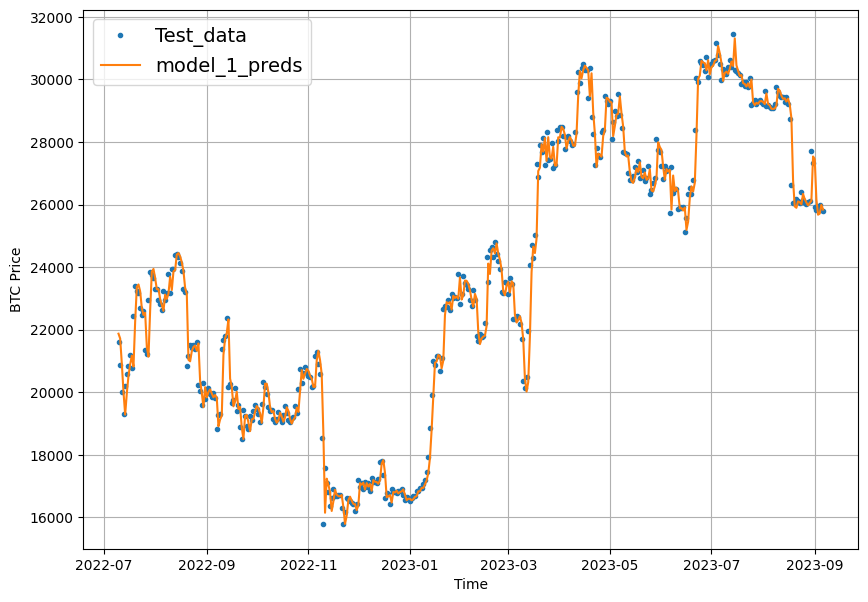

In [ ]:
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format=".", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (Window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes: 
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]), array([[3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604,
        3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615,
        3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624],
       [3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605,
        3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616,
        3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625],
       [3596, 3597, 3

(3597, 3597)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2877, 720, 2877, 720)

In [ ]:
tf.random.set_seed(26)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 4ms/step - loss: 779.1328


779.1328125

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 4ms/step - loss: 761.4287


761.4287109375

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
model_2_preds[:10]

23/23 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([48311.93 , 48311.766, 47182.68 , 47957.27 , 47946.555, 43860.426,
       40939.64 , 41658.22 , 44106.934, 43858.426], dtype=float32)>

In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 761.42865,
 'mse': 1401271.2,
 'rmse': 1183.753,
 'mape': 2.3285232,
 'mase': 1.1114416}

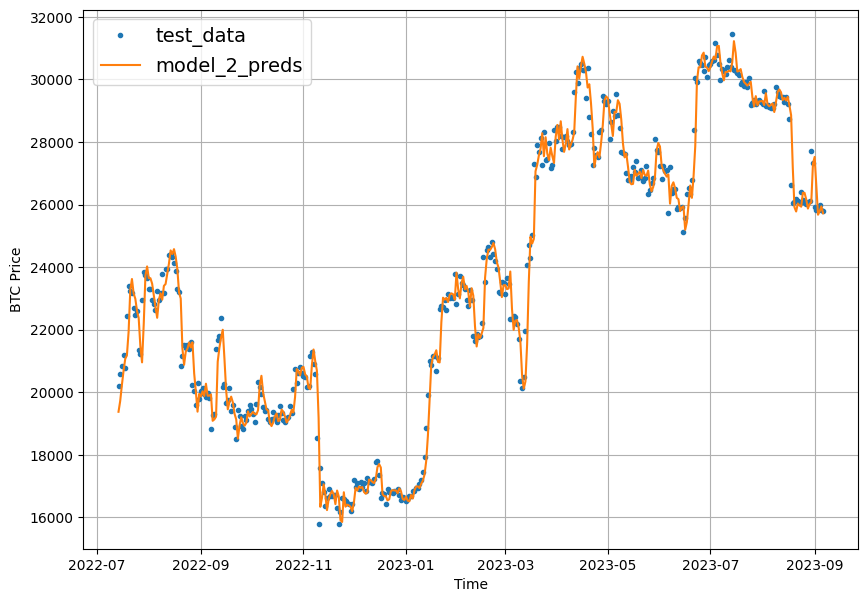

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format=".", label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7 )

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes: 
 (array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]]), array([[3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598,
        3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609,
        3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620,
        3621, 3622, 3623, 3624],
       [3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599,


(3591, 3591)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2872, 719, 2872, 719)

In [ ]:
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# evaluate our model with larger window size and horizon
model_3.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 4ms/step - loss: 1549.7180


1549.718017578125

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 1437.4410


1437.4410400390625

In [ ]:
model_3_preds= make_preds(model_3,
                         input_data=test_windows)

23/23 [==============================] - 0s 3ms/step


In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)

In [ ]:
def evaluate_preds_(y_true, y_pred):
  y_true=tf.cast(y_true, dtype=tf.float32)
  y_pred=tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  rmse = tf.sqrt(mse)

  # Account for different size metrics for larger horizon reduce it to single number
  if mae.ndim>0: # if mse isnt a scalar reduce it to one by aggregating tensor to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    mape =tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
    rmse = tf.reduce_mean(rmse)

  return {"mae" : mae.numpy(),
          "mse" : mse.numpy(),
          "mape" : mape.numpy(),
          "mase" : mase.numpy(),
          "rmse" : rmse.numpy()}

In [ ]:
model_3_results_ = evaluate_preds_(y_true=tf.squeeze(test_labels),
                                   y_pred=model_3_preds)
model_3_results_

{'mae': 1437.4409,
 'mse': 4780467.5,
 'mape': 4.487355,
 'mase': 2.0886087,
 'rmse': 1664.034}

In [ ]:
X_test[-len(test_windows):][:5] # I get it

array(['2021-09-18T00:00:00.000000000', '2021-09-19T00:00:00.000000000',
       '2021-09-20T00:00:00.000000000', '2021-09-21T00:00:00.000000000',
       '2021-09-22T00:00:00.000000000'], dtype='datetime64[ns]')

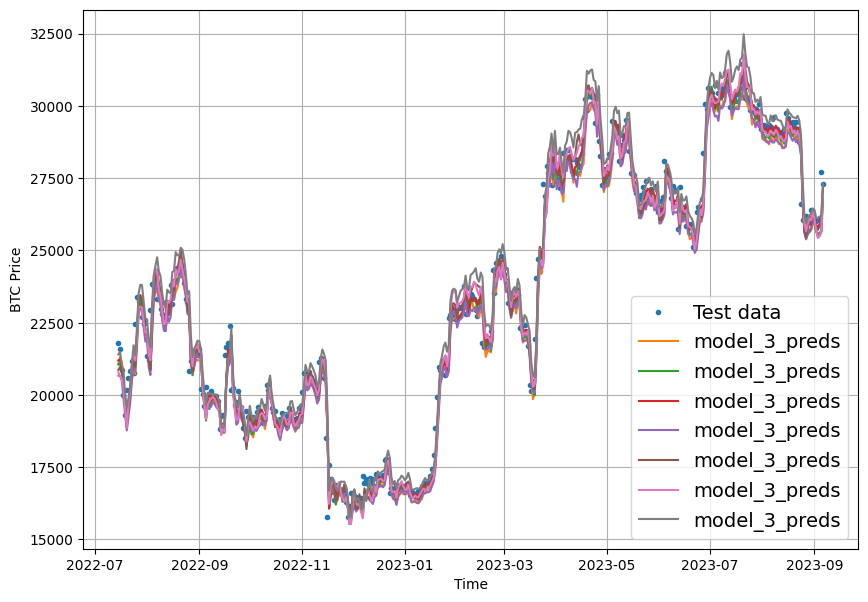

In [ ]:
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, format="-", start=offset, label="model_3_preds")

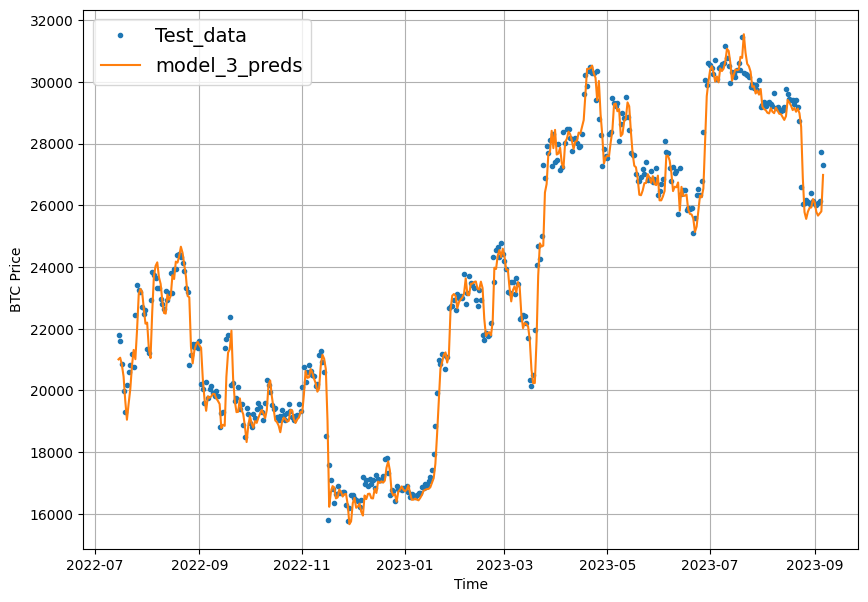

In [ ]:
offset=300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, format="-", label="model_3_preds")

## Which model perform best so far

In [ ]:
naive_results["mae"], model_1_results["mae"]

(687.2366, 693.04816)

In [ ]:
{"naive model" : naive_results["mae"],
              "horizon_1_windows_7" : model_1_results["mae"],
              "horizon_1_windows_30" : model_2_results["mae"],
              "horizon_7_windows_30" : model_3_results_["mae"]}

{'naive model': 687.2366,
 'horizon_1_windows_7': 693.04816,
 'horizon_1_windows_30': 761.42865,
 'horizon_7_windows_30': 1437.4409}

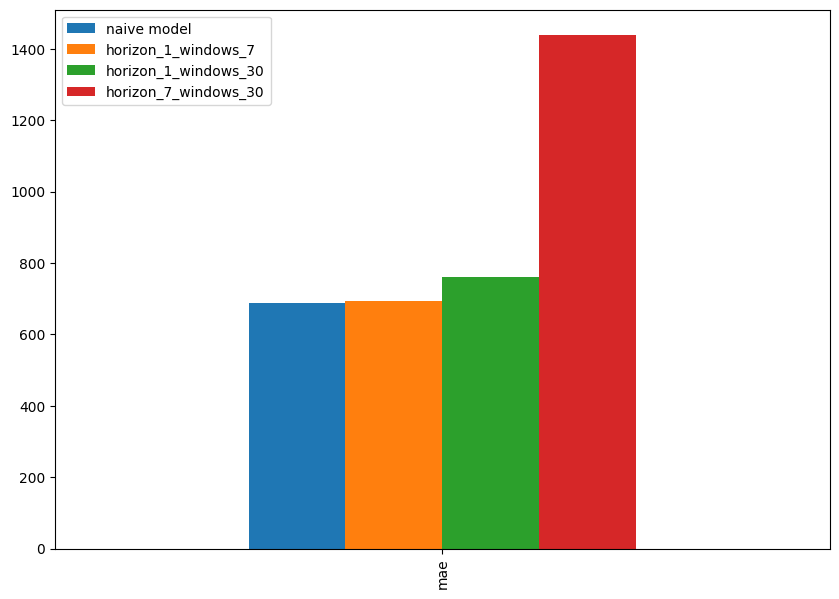

In [ ]:
pd.DataFrame({"naive model" : naive_results["mae"],
              "horizon_1_windows_7" : model_1_results["mae"],
              "horizon_1_windows_30" : model_2_results["mae"],
              "horizon_7_windows_30" : model_3_results_["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4 Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

Window step:
 [[0 1 2 3 4 5 6 7]]
Window indexes: 
 (array([[0, 1, 2, 3, 4, 5, 6, 7],
       [1, 2, 3, 4, 5, 6, 7, 8],
       [2, 3, 4, 5, 6, 7, 8, 9]]), array([[3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624],
       [3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625],
       [3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626]]), (3620, 8))


(3620, 3620)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2896, 724, 2896, 724)

✅ Using [Conv1D layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)

✅ inputs are `(batch_size, timesteps, input_dim)`.'

✅ `batch_size` is 32 by default

✅ `timesteps = WiNDOW_SIZE` also known as `features``

✅ `input_dim = HORIZON`

In [ ]:
# Check data sample shape
train_windows[0].shape

(7,)

Right now our data has the `timesteps` dimension ready but we'll have to adjust it to have the `input_dim` dimension.

To Fix this, we could adjust the shape of all of our `train_windows` or we could use a [`tf.keras.layers.Lamdba`](https://keras.io/api/layers/core_layers/lambda/) (called a Lambda layer) to do this for us in our model.

The Lambda layer wraps a function into a layer which can be used with a mode.

Let's try it out.

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[132.18]
 [114.13]
 [123.63]
 [129.01]
 [128.55]
 [129.  ]
 [126.94]]


In [ ]:
tf.random.set_seed(26)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 4ms/step - loss: 702.0894


702.08935546875

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44717.246, 45631.75 , 44956.23 , 46559.516, 47947.8  , 47798.125,
       47344.99 , 47966.047, 47306.195, 43428.586], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 702.0894,
 'mse': 1218299.0,
 'rmse': 1103.7657,
 'mape': 2.1455357,
 'mase': 1.0213051}

## Model 5: RNN (LSTM)

In [ ]:
from sklearn.utils import validation
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

23/23 [==============================] - 0s 3ms/step - loss: 732.2977


732.2976684570312

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

23/23 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44412.33 , 45303.21 , 45098.387, 46353.195, 47693.227, 47945.348,
       47585.535, 48148.09 , 47606.152, 44247.87 ], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 732.2977,
 'mse': 1293523.2,
 'rmse': 1137.3317,
 'mape': 2.2447922,
 'mase': 1.0652481}

## Multivariate time series

Since Bitcoin is an open system. There are so many factors that can affect the future price of bitcoin example can be tweet of very important people like elon musk or other bitcoin expert.
But in this project we are going to add the Bitcoin block reward size as a extra features taking our univariate time (only the historial price of Bitcoin)series to a multivariate time series(price of bitcoin as well as the block reward size).






To learn more about bitcoin rewards systems visit [cmcmarket.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).
also [coinledger.com](https://coinledger.io/learn/bitcoin-halving-dates)

| Block Reward | Start Date |
|-----|-----|
| 50 | 3 Jan 2009 |
| 25 | 28 Nov 2012 |
| 12.5 | 9 Jul 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | Expected 2024 |
| 1.5625 | Expected 2028 |
| 0.78125 | Expected 2032 |

In [ ]:
df = pd.read_csv("/content/bitcoin_2013-10-01_to_2023-09-06.csv",
                 parse_dates=["Start"],
                 index_col=["Start"])
df.tail()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2023-09-01,2023-09-02,25966.92,26131.86,25400.90,25816.57,4.438128e+10,5.043267e+11
2023-09-02,2023-09-03,25795.04,25945.99,25760.02,25856.93,3.564394e+10,5.029054e+11
2023-09-03,2023-09-04,25859.24,26057.27,25830.07,25980.60,2.482436e+10,5.046746e+11
2023-09-04,2023-09-05,25958.07,26051.36,25677.71,25824.15,2.598490e+10,5.044351e+11
2023-09-05,2023-09-06,25832.11,25839.59,25573.33,25788.70,3.072003e+10,5.013095e+11


In [ ]:
# Create only closing price for each day
bitcoin_prices = pd.DataFrame(data=df["Close"]).rename(columns={"Close":"Prices"})
bitcoin_prices.head()

,Prices
Start,
2013-10-01,132.18
2013-10-02,114.13
2013-10-03,123.63
2013-10-04,129.01
2013-10-05,128.55


In [ ]:
# Block reward values
block_reward_1 = 25 # nov 28 2012
block_reward_2 = 12.5 # 9 jul 2016
block_reward_3 = 6.25 # 18 May 2020

# Date timesteps
block_reward_1_datetime = np.datetime64("2012-11-28")
block_reward_2_datetime = np.datetime64("2016-07-09")
block_reward_3_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_2_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
len(bitcoin_prices) - (block_reward_2_days + block_reward_3_days)

194

In [ ]:
# Add in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# set the value of block reward column (its the last column here -1 indexing on iloc)


In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_1
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_3
bitcoin_prices_block

,Prices,block_reward
Start,,
2013-10-01,132.18,25
2013-10-02,114.13,25
2013-10-03,123.63,25
2013-10-04,129.01,25
2013-10-05,128.55,25
...,...,...
2023-09-01,25816.57,6.25
2023-09-02,25856.93,6.25
2023-09-03,25980.60,6.25


### Lets look that our new variable

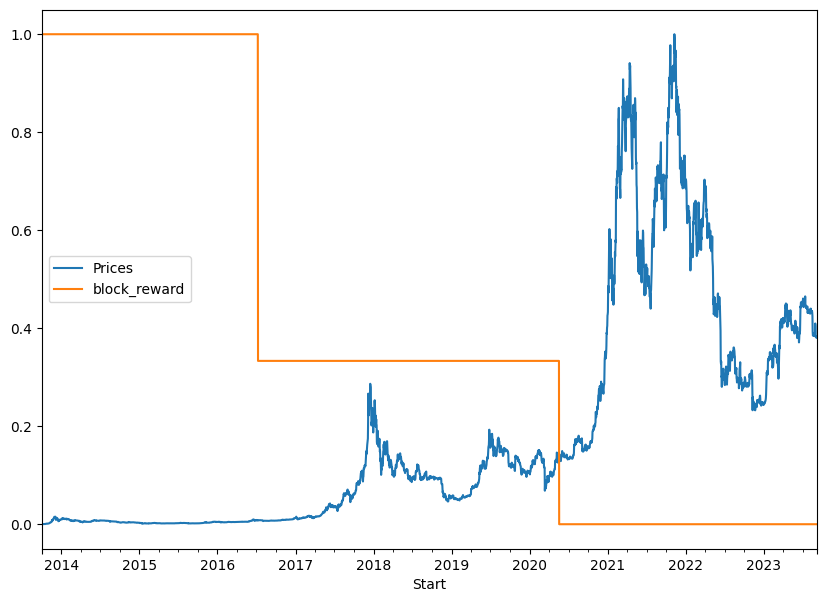

In [ ]:
# Plot block reward /Prices over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Prices", "block_reward"]]),
                            columns=bitcoin_prices_block.columns,
                            index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7));

## Making a window dateset in pandas

In [ ]:
# Set dataset hyperparameter
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of bitcoin historical data using block_reward_features
bitcoin_prices_windowed = bitcoin_prices_block.copy()
bitcoin_prices_windowed

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in windows
  bitcoin_prices_windowed[f"Prices+{i+1}"] = bitcoin_prices_windowed["Prices"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Prices,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Start,,,,,,,,,
2013-10-01,132.18,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,114.13,25,132.18,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,123.63,25,114.13,132.18,NaN,NaN,NaN,NaN,NaN
2013-10-04,129.01,25,123.63,114.13,132.18,NaN,NaN,NaN,NaN
2013-10-05,128.55,25,129.01,123.63,114.13,132.18,NaN,NaN,NaN
2013-10-06,129.00,25,128.55,129.01,123.63,114.13,132.18,NaN,NaN
2013-10-07,126.94,25,129.00,128.55,129.01,123.63,114.13,132.18,NaN
2013-10-08,126.00,25,126.94,129.00,128.55,129.01,123.63,114.13,132.18
2013-10-09,130.69,25,126.00,126.94,129.00,128.55,129.01,123.63,114.13


In [ ]:
# Let create X and y,remove the NAN and convert to float32 to prevent Tensorflow errors
X = bitcoin_prices_windowed.dropna().drop("Prices", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Prices"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Start,,,,,,,,
2013-10-08,25.0,126.940002,129.000000,128.550003,129.009995,123.629997,114.129997,132.179993
2013-10-09,25.0,126.000000,126.940002,129.000000,128.550003,129.009995,123.629997,114.129997
2013-10-10,25.0,130.690002,126.000000,126.940002,129.000000,128.550003,129.009995,123.629997
2013-10-11,25.0,130.589996,130.690002,126.000000,126.940002,129.000000,128.550003,129.009995
2013-10-12,25.0,130.899994,130.589996,130.690002,126.000000,126.940002,129.000000,128.550003


In [ ]:
y.head()

Start
2013-10-08    126.000000
2013-10-09    130.690002
2013-10-10    130.589996
2013-10-11    130.899994
2013-10-12    135.190002
Name: Prices, dtype: float32

In [ ]:
# Make train test split
split_size = int(0.8 * len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2896, 8), (724, 8), (2896,), (724,))

Training and test multivariant time series data is made! Time to build a model

## Model 6: (Dense) Multivariant time series

In [ ]:
# Make a multivariant time series model
model_6 = tf.keras.Sequential(name=("model_6_Dense_multivariant"))
model_6.add(tf.keras.layers.Dense(128, activation="relu"))
model_6.add(tf.keras.layers.Dense(128, activation="relu"))
model_6.add(tf.keras.layers.Dense(HORIZON))

# Compile model
model_6.compile(loss="mae",
              optimizer="Adam")

# Fit model
model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
model_6.evaluate(X_test, y_test) # Original performer

23/23 [==============================] - 0s 2ms/step - loss: 700.7663


700.7662963867188

In [ ]:
model_6 = tf.keras.saving.load_model("model_experiments/model_6_Dense_multivariant") # Best performance model saved
model_6.evaluate(X_test, y_test)

23/23 [==============================] - 0s 3ms/step - loss: 689.5881


689.5880737304688

In [ ]:
X_test.shape

(724, 8)

In [ ]:
# Make prediction on test data
model_6_pred = tf.squeeze(model_6.predict(X_test))
model_6_pred[:10]

23/23 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45010.547, 45755.477, 44986.875, 46863.98 , 48071.805, 47905.62 ,
       47441.152, 48142.742, 47361.75 , 43375.55 ], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_pred)
model_6_results

{'mae': 689.5879,
 'mse': 1192268.9,
 'rmse': 1091.9106,
 'mape': 2.1142266,
 'mase': 1.0031196}

In [ ]:
# Added and extra Dense layer
# Assignment dont forget to try Hybrid embedding

## Model 7 : N-BEATS algorithm

* N_BEATS [Neural Base Expansion Analysis for interpretable Time Series Forcasting algorithm](https://arxiv.org/pdf/1905.10437.pdf)

* N-BEATS algorithm focuses on time series problem and achieved state-of-art performance in the winners of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128)

* Replicating N-BEATS Generic algorithms [Section 3.3](https://arxiv.org/pdf/1905.10437.pdf)

### Steps

* Replicating the model architecture on Figure 1 of N-BEATS paper
* Use same hyperparameter found in the Appendix D of N-BEATS paper
* Create a custom layer by subclassimg